In [46]:
%autosave 0
from __future__ import absolute_import, division, print_function
%pylab inline
%load_ext autoreload
%autoreload 2
from coreRecognizer import *
from statictics import *

Autosave disabled
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [78]:
def predict_norm(norm, data, labels, img):
    best_class = -1;
    best_match = 1000000000;
    for cl in range(len(data)):
        for item in data[cl]:
            current = norm(img,item)
            if(current < best_match):
                best_class = cl
                best_match = current
    return best_class

def kNN(norm, data, labels, img, k):    
    best_classes = [];
    #print(data[0][0].shape)
    for cl in range(len(data)):
        for i,item in enumerate(data[cl]):
            best_classes.append([norm(img,item),cl,i])
            if(len(best_classes) > k):
                best_classes.sort(key=lambda x: x[0])
                best_classes = best_classes[:k]
    #get the class
    nr_classes = {}
    for cl in best_classes:
        if cl[1] in nr_classes:
            nr_classes[cl[1]] += 1
        else:
            nr_classes[cl[1]] = 1
    v=list(nr_classes.values())
    k=list(nr_classes.keys())
    return k[v.index(max(v))]



def tr(train_data, train_label, args=None):
    train_data = train_data.reshape((train_data.shape[0],train_data.shape[1],-1))
    return [train_data,  train_label]

def predict(model, img, args=None):
    return predict_norm(distance, model[0], model[1], img)

def predictkNN(model, img, args=None):
    img = img.reshape(img.shape[0]*img.shape[1])
    return kNN(distance, model[0], model[1], img, args['kNN-k'])

#show_result(predict,  tr, "NN", 3)
result = show_result(predictkNN,  tr, "NN", -1,{"kNN-k":1})

('time for preposesing:', 0, 'ms')
('time for predicting:', 2079, 'ms')
('correct:', 3)
('incorect:', 197)


1


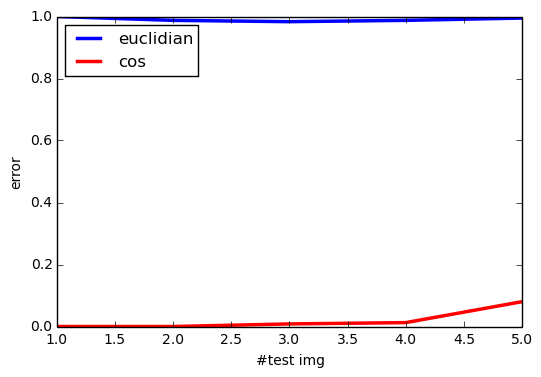

In [76]:
def f(p,q,h):
    def predictkNN1(model, img, args=None):
        img = img.reshape(img.shape[0]*img.shape[1])
        return kNN(h, model[0], model[1], img, args['kNN-k'])
    return show_result(predictkNN1,  tr, "NN", p,q,False)
statistica_nr_imagini_X_error(f,[{'nr':i,'variable':{"kNN-k":1}} for i in range(1,6)],["#test img","error"]
                             , norms=[cosSimilarity,distance], 
                              normsNames=['euclidian',"cos"])

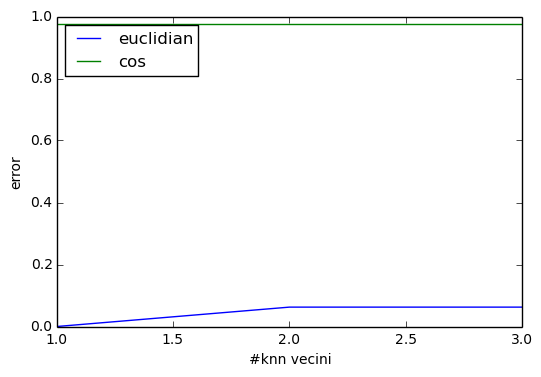

In [38]:
statistica_knn_vecini_X_error(f,[{'nr':-4,'variable':{"kNN-k":i}} for i in range(1,4)],["#knn vecini","error"]
                             , norms=[distance,cosSimilarity], 
                              normsNames=['euclidian',"cos"])

('time for preposesing:', 0, 'ms')
('time for predicting:', 1664, 'ms')
('correct:', 189)
('incorect:', 11)


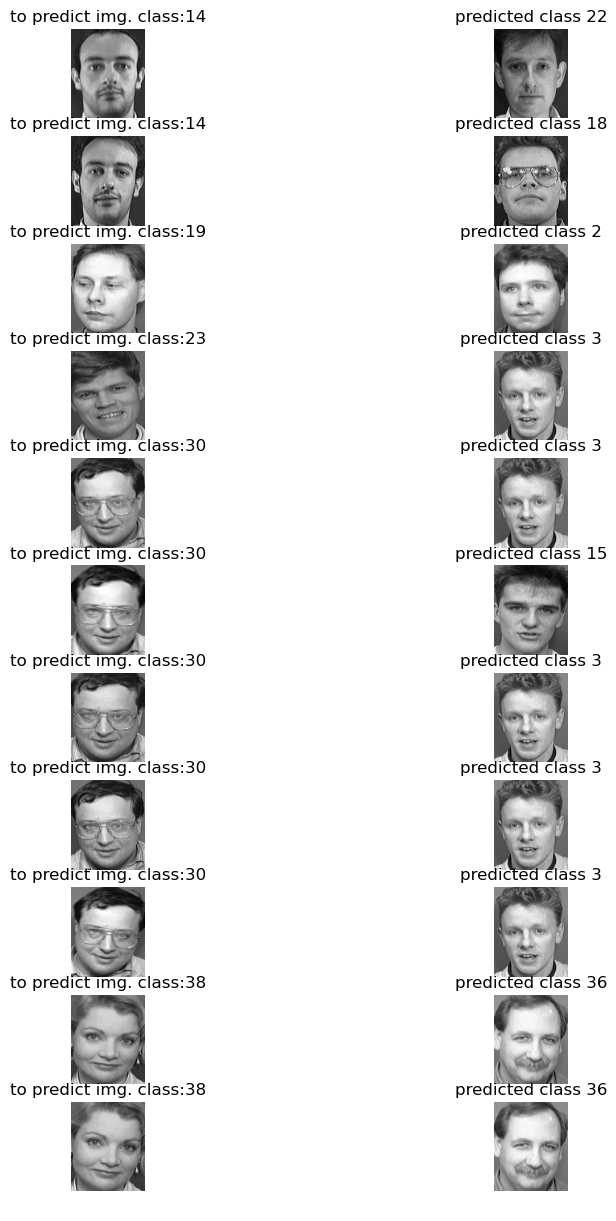

In [5]:
result = show_result(predictkNN,  tr, "NN", -5,{"kNN-k":1})
show_Prediction_result(result[4])

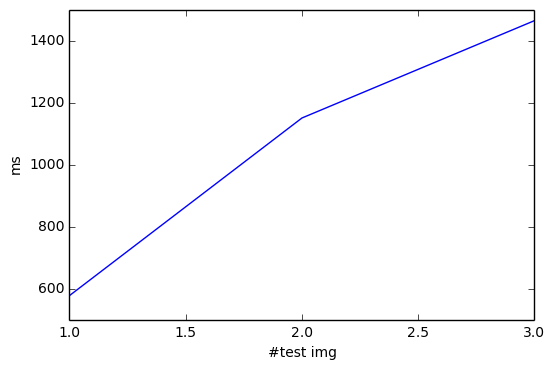

In [11]:
statistica_nr_imagini_X_timpEx(f,[{'nr':i,'variable':{"kNN-k":1}} for i in range(1,4)],["#test img","ms"])

In [55]:
a = np.arange(5)
b = np.ones(5)*2
np.sum(a*a)/np.sum(b*b)

1.5

In [54]:
b*b

array([ 4.,  4.,  4.,  4.,  4.])